
# Project: Investigate a Dataset (Hollywood Movie)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I have chosen Hollywood movie data set provided by Udacity for this project. This data set contains information about 10,000 movies collected from The Movie Database (TMDb) from year 1960 to 2015, including movie's information, popularity, budget and revenue. The dataset has total of 10866 rows and 21 columns. 
  
>### The following questions can be asked based on this dataset:
* What is the overall trend of number of movies released over the years?
* Which movie has the highest and the lowest revenue; budget and runtime?
* Which genres are the most popular?
* Which top 10 actors have been frequently casted?
* What is the correlation between budget and revenue? Are higher budgeted movies always popular?

In [1]:
#import required libraries for analysis and visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

In this section, we will access and gather our data that we need to answer our questions. We will then clean our data to identify any problems in terms of quality and structure such as missing and duplicate values. We will then trim and clean our dataset by modifying, replacing and removing data to obtain the highest quality as we as well-structured data for our further analysis.

In [2]:
#loading the csv file
tmdb_df = pd.read_csv('tmdb-movies.csv')

# read first 5 rows of the dataset
tmdb_df.head() 

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#access number of rows and columns of dataset
tmdb_df.shape

(10866, 21)

In [4]:
#display summary of data including number of non-null values
tmdb_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

There are many missing values in many columns of our data. We will remove some of the columns that aren't directly relevant to our questions and discard the missing and duplicate values on our remaining data set.

In [5]:
# display useful descriptive statistics for each column of data
tmdb_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


We can find few important findings such as movies released from year 1960 to 2015. The average budget was 1.46 million usd and the revenue average is approximately 4 million usd. 

In [6]:
#delete unwanted columns
tmdb_df.drop(['id','imdb_id','homepage', 'tagline','overview','keywords','budget_adj','vote_count','production_companies','vote_average','revenue_adj'], axis=1, inplace=True)
tmdb_df.head() #print top 5 rows

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2015


In [7]:
#check if there are any duplicate values
tmdb_df.duplicated().sum()

1

In [8]:
#drop any duplicate value
tmdb_df.drop_duplicates(inplace = True)

In [9]:
#summary of data
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 10 columns):
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
cast              10789 non-null object
director          10821 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_date      10865 non-null object
release_year      10865 non-null int64
dtypes: float64(1), int64(4), object(5)
memory usage: 933.7+ KB


In [10]:
#Convert 'release date' from string to datetime format.
tmdb_df['release_date']= pd.to_datetime(tmdb_df['release_date'])
tmdb_df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2015


In [11]:
# view missing value count for each feature
tmdb_df.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
release_year       0
dtype: int64

We are now going to drop the rows with missing values.

In [12]:
#drop rows with any null values
tmdb_df.dropna(inplace=True)
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 10 columns):
popularity        10731 non-null float64
budget            10731 non-null int64
revenue           10731 non-null int64
original_title    10731 non-null object
cast              10731 non-null object
director          10731 non-null object
runtime           10731 non-null int64
genres            10731 non-null object
release_date      10731 non-null datetime64[ns]
release_year      10731 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 922.2+ KB


Now, we have a total of 10731 rows and the data set looks well structuctured with no missing and duplicate values. 

<a id='eda'></a>
## Exploratory Data Analysis

> Now that we've trimmed and cleaned our data, we're ready to move on to exploration. In this section, we are going to compute statistics and create visualizations with the goal of addressing the research questions that we posed in the Introduction section. 

### Research Question 1 : What is the overall trend of number of movies released over the years? 

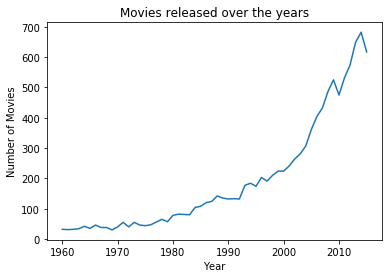

In [13]:
#use value.counts()function to find total count of movies released over the years
movies_trend = tmdb_df['release_year'].value_counts().sort_index()
movies_trend.plot(title='Movies released over the years')
plt.xlabel('Year')
plt.ylabel('Number of Movies');


In [14]:
#display year with min and max value
movies_trend.idxmin(),movies_trend.idxmax() 

(1969, 2014)

In [15]:
#display the number of movies released respective to above years
movies_trend.min(),movies_trend.max()

(30, 682)

### Research Question 2  : Which movie has the highest and the lowest revenue, budget and runtime?

In [16]:
#define a function that results highest and lowest values with column name as an argument
def min_max(col_name):
    min = tmdb_df[col_name].idxmin() #lowest index value of column
    max = tmdb_df[col_name].idxmax() #highest index value of column
    
    highest = pd.DataFrame(tmdb_df.loc[max])
    lowest = pd.DataFrame(tmdb_df.loc[min])
    
    print("Movie with the highest " + col_name + ":", tmdb_df['original_title'][max])
    print("Movie with the lowest " + col_name + ":", tmdb_df['original_title'][min])
    return pd.concat([highest,lowest], axis = 1) #concatente two columns

In [17]:
min_max('revenue') #calling function and passing 'revenue' column as an argument

Movie with the highest revenue: Avatar
Movie with the lowest revenue: Wild Card


,1386,48
popularity,9.43277,2.93234
budget,237000000,30000000
revenue,2781505847,0
original_title,Avatar,Wild Card
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Jason Statham|Michael Angarano|Milo Ventimigli...
director,James Cameron,Simon West
runtime,162,92
genres,Action|Adventure|Fantasy|Science Fiction,Thriller|Crime|Drama
release_date,2009-12-10 00:00:00,2015-01-14 00:00:00
release_year,2009,2015


In [18]:
min_max('budget') #calling function and passing 'budget' column as an argument

Movie with the highest budget: The Warrior's Way
Movie with the lowest budget: Mr. Holmes


,2244,30
popularity,0.25054,3.92733
budget,425000000,0
revenue,11087569,29355203
original_title,The Warrior's Way,Mr. Holmes
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Ian McKellen|Milo Parker|Laura Linney|Hattie M...
director,Sngmoo Lee,Bill Condon
runtime,100,103
genres,Adventure|Fantasy|Action|Western|Thriller,Mystery|Drama
release_date,2010-12-02 00:00:00,2015-06-19 00:00:00
release_year,2010,2015


In [19]:
min_max('runtime') #calling function and passing 'runtime' column as an argument

Movie with the highest runtime: The Story of Film: An Odyssey
Movie with the lowest runtime: Mythica: The Necromancer


,3894,92
popularity,0.006925,1.87604
budget,0,0
revenue,0,0
original_title,The Story of Film: An Odyssey,Mythica: The Necromancer
cast,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...
director,Mark Cousins,A. Todd Smith
runtime,900,0
genres,Documentary,Fantasy|Action|Adventure
release_date,2011-09-03 00:00:00,2015-12-19 00:00:00
release_year,2011,2015


### Research Question 3  : Which genres are the most popular? 

In [20]:
#define a function that results highest values with column name as an argument
def popular(column_name):
    data = tmdb_df[column_name].str.cat(sep = '|') # convert column values to string and separate by '|'
    data = pd.Series(data.split('|'))
    count = data.value_counts(ascending=False)
    return count

In [21]:
popular_genre = popular('genres') #calling function and passing 'genres' argument
popular_genre.head(),popular_genre.tail() #display first and last 5 rows

(Drama       4746
 Comedy      3775
 Thriller    2902
 Action      2376
 Romance     1708
 dtype: int64, History     330
 War         268
 Foreign     184
 Western     164
 TV Movie    162
 dtype: int64)

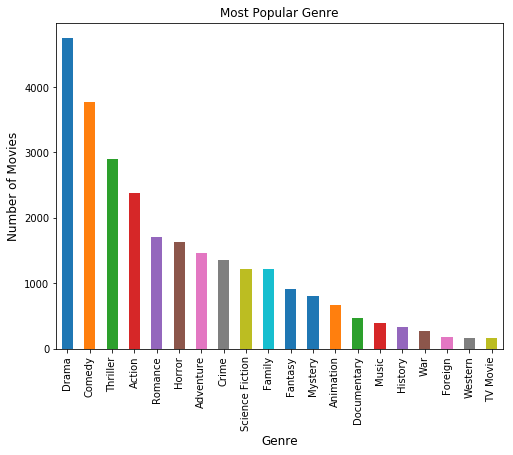

In [22]:
#plot a bar chart to display overall popular movie genres
popular_genre.plot(kind = 'bar', figsize = (8,6),title ='Most Popular Genre')
plt.xlabel('Genre',fontsize = 12)
plt.ylabel('Number of Movies',fontsize =12);

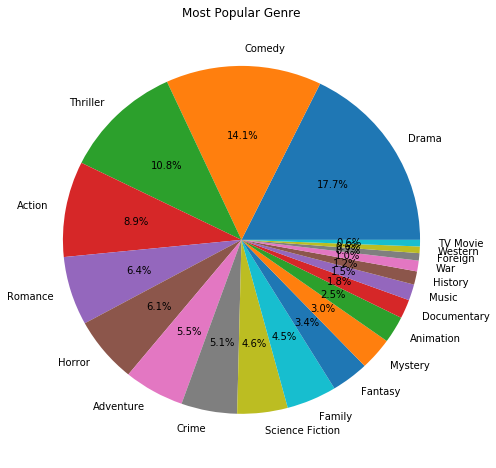

In [23]:
#plot a pie chart to display the popular genre in percentage
popular_genre.plot(kind = 'pie', figsize = (8,8),autopct='%1.1f%%',title ='Most Popular Genre')
plt.ylabel('');

### Research Question 4: Which top 10 actors have been frequently casted?

In [24]:
top_actors = popular('cast')#calling function and passing 'cast' argument
top_actors.head(10)

Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
Nicolas Cage         61
Michael Caine        53
Robin Williams       51
John Cusack          50
John Goodman         49
Morgan Freeman       49
Liam Neeson          48
dtype: int64

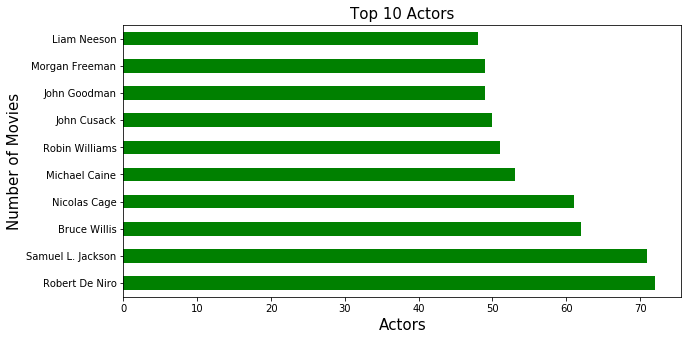

In [25]:
#plot a chart to display top 10 actors with the most number of movies
top_actors.iloc[:10].plot(kind = 'barh',figsize=(10,5),color = 'green') 
plt.title ('Top 10 Actors',fontsize =15);
plt.xlabel('Actors',fontsize = 15)
plt.ylabel('Number of Movies',fontsize =15);

### Research Question 5 : What is the correlation between budget and revenue? Are high budgeted movies always popular?

In [26]:
#Use numpy correlation coefficent to calculte the correlation
r = np.corrcoef(tmdb_df['budget'],tmdb_df['revenue'])[0][1] # correlation between budget and revenue
print(r)

0.734487362405


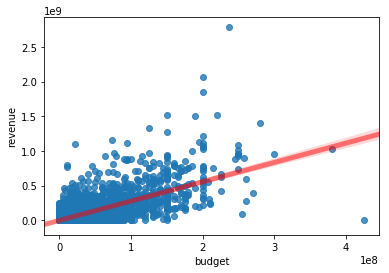

In [27]:
#plot chart to show the relationship between the budget and the revenue of the movies
sns.regplot(x=tmdb_df['budget'],y=tmdb_df['revenue'],line_kws={"color":"r","alpha":0.5,"lw":5});

In [28]:
##Use numpy correlation coefficent to calculte the correlation
r = np.corrcoef(tmdb_df['budget'],tmdb_df['popularity'])[0][1] # correlation between budget and popularity
print(r)

0.544239812603


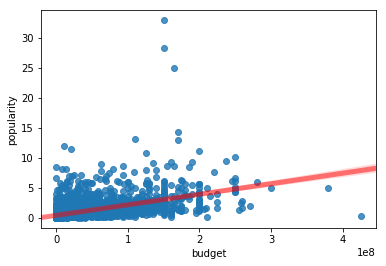

In [29]:
#plot chart to show the relationship between the budget and the popularity of the movies
sns.regplot(x=tmdb_df['budget'],y=tmdb_df['popularity'],line_kws={"color":"r","alpha":0.5,"lw":5});

<a id='conclusions'></a>
## Conclusions

We found some interesting findings based on our analysis on 10,000 hollywood movie dataset. 
* The number of movies release have significatly increased over past decades with only 30 movies released in year 1969 as opposed to 682 releases in 2014. We can visually observe this with the exponential curve in the graph.
* The highest revenue was earned by 'AVATAR' with the box office collection of 2.79 billion USD against its budget of only 237 million USD where as the lowest revenue was collected by movie 'Wild Card'.
* The highest budgeted movie was 'The Warrior's Way' with the budget of 425 million USD and the lowest budgeted was 'Mr.Holmes'.
* 'The Story of Film: An Odyssey' has the highest runtime with 900 minutes.It is possible as this was 15-one hour episode documentary presented in television.
* Drama, Comedy, Thriller and Action were the most popular movie genre compared to Western, Foreign and TV movies.
* Robert Deniro was the most frequent actor casted in many movies followed by Samuel L.Jackson.
* The correlation between both budget & revenue and budget & popularity is positive. This determines that high budget movies have higher possibilty to earn more revenues which corresponds to more popularity.

In [31]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0